**6. Spam Base**
---
<https://archive.ics.uci.edu/ml/datasets/spambase>


In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion, del_nan

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
spam = pd.read_csv('spambase.data', header=None)
df = spam
df.rename(columns={57:'y'}, inplace=True)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

In [7]:
len(df)+len(df_test)

4601

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,y
1001,0.45,0.91,0.91,0.0,0.45,0.0,0.00,0.45,0.0,1.83,...,0.0,0.245,0.000,1.633,0.245,0.081,64.416,708,773,1
1022,0.00,0.00,0.44,0.0,1.34,0.0,0.44,0.00,0.0,0.00,...,0.0,0.068,0.000,0.482,0.896,0.000,6.770,78,325,1
2324,0.51,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.333,0.047,0.000,0.000,0.000,1.196,5,67,0
3600,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,1.000,1,4,0
401,1.05,0.00,0.70,0.0,1.05,0.0,0.70,0.00,0.0,0.35,...,0.0,0.000,0.000,0.367,0.061,0.000,1.880,12,94,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 1001 to 1405
Data columns (total 58 columns):
0     3680 non-null float64
1     3680 non-null float64
2     3680 non-null float64
3     3680 non-null float64
4     3680 non-null float64
5     3680 non-null float64
6     3680 non-null float64
7     3680 non-null float64
8     3680 non-null float64
9     3680 non-null float64
10    3680 non-null float64
11    3680 non-null float64
12    3680 non-null float64
13    3680 non-null float64
14    3680 non-null float64
15    3680 non-null float64
16    3680 non-null float64
17    3680 non-null float64
18    3680 non-null float64
19    3680 non-null float64
20    3680 non-null float64
21    3680 non-null float64
22    3680 non-null float64
23    3680 non-null float64
24    3680 non-null float64
25    3680 non-null float64
26    3680 non-null float64
27    3680 non-null float64
28    3680 non-null float64
29    3680 non-null float64
30    3680 non-null float64
31    3680 non-null fl

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,y
count,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,...,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.00000,3680.000000,3680.000000,3680.000000
mean,0.103625,0.212758,0.282560,0.055253,0.309878,0.095242,0.113552,0.107318,0.091992,0.243603,...,0.041214,0.141235,0.016245,0.265983,0.073617,0.041192,5.58785,53.503804,288.177446,0.394022
std,0.301069,1.285161,0.494263,1.327907,0.653582,0.279555,0.386976,0.409414,0.287725,0.604189,...,0.260975,0.284416,0.095278,0.617169,0.204671,0.339937,35.35522,212.072410,635.326835,0.488706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.57775,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.27050,14.000000,94.000000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.191000,0.000000,0.326250,0.055000,0.000000,3.70875,43.000000,270.000000,1.000000
max,4.540000,14.280000,4.540000,42.810000,9.090000,5.880000,7.270000,11.110000,5.260000,11.110000,...,4.385000,9.752000,2.777000,9.575000,5.300000,13.129000,1102.50000,9989.000000,15841.000000,1.000000


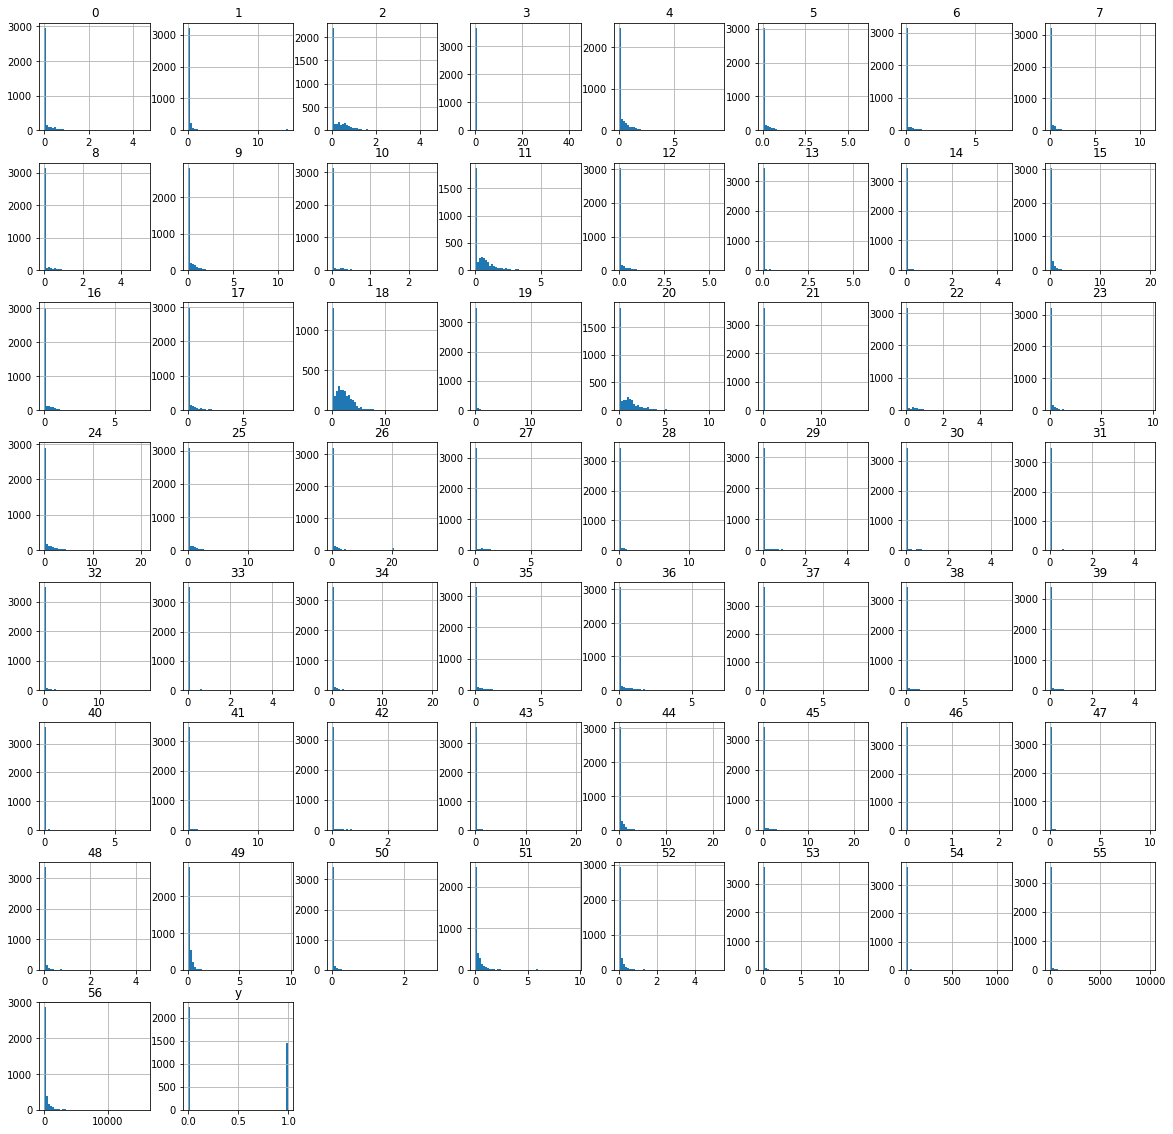

In [11]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

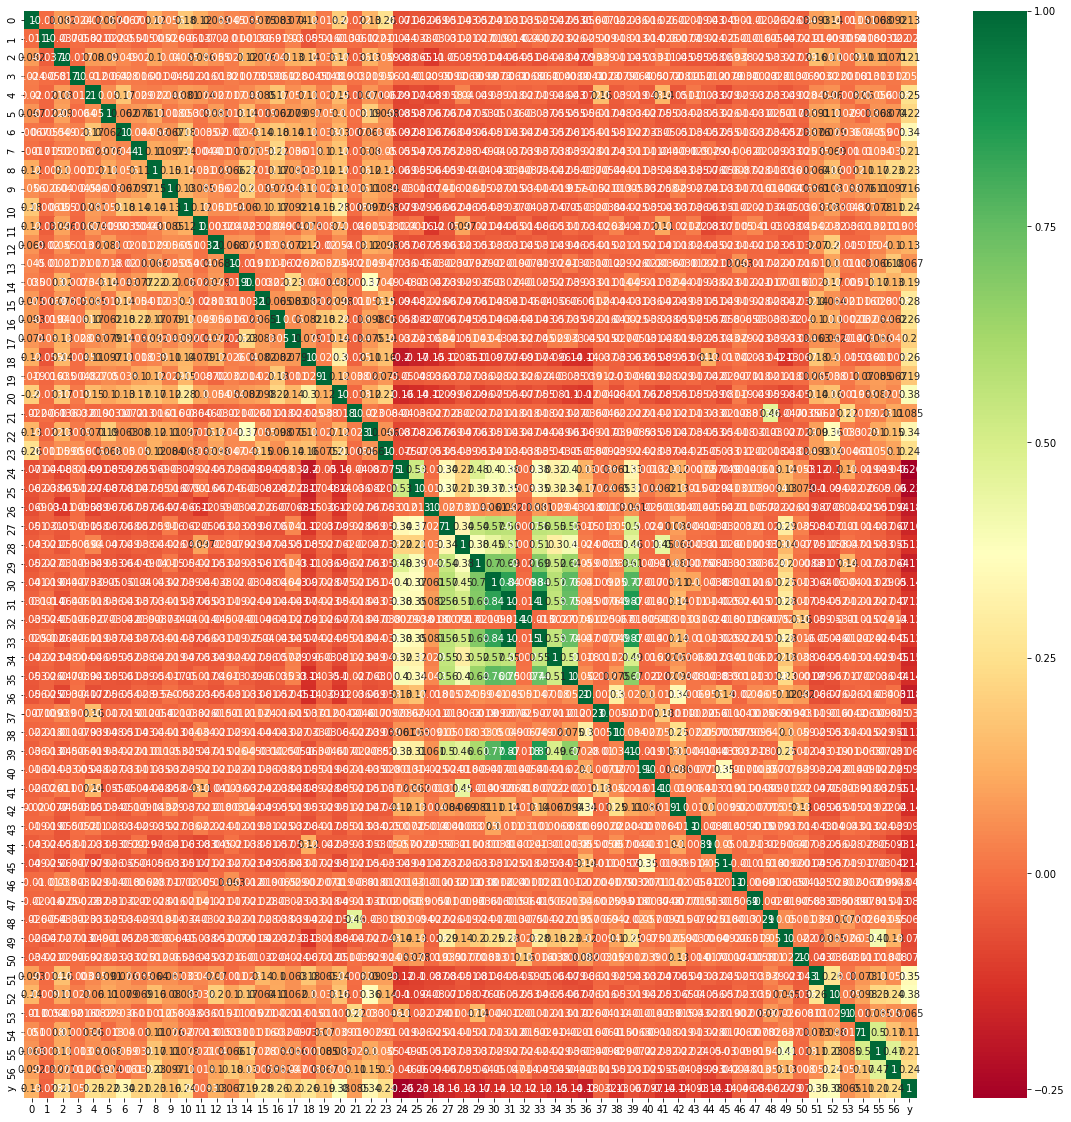

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [13]:
corrmat['y'].sort_values(ascending=True)

24   -0.260207
25   -0.234008
26   -0.184201
36   -0.181364
29   -0.174972
27   -0.160000
34   -0.147699
45   -0.144084
42   -0.141566
35   -0.141188
30   -0.141042
44   -0.140804
41   -0.136708
28   -0.133227
38   -0.131540
32   -0.119658
31   -0.116854
33   -0.115256
40   -0.096713
43   -0.093058
47   -0.083526
49   -0.078695
50   -0.073249
39   -0.067144
48   -0.062264
46   -0.045523
37   -0.032005
1    -0.028264
11    0.009307
3     0.050803
53    0.065111
13    0.066664
21    0.084838
54    0.113063
12    0.127761
0     0.132926
9     0.158460
19    0.185260
14    0.191278
17    0.203040
55    0.205204
7     0.212672
2     0.214872
5     0.223485
8     0.229148
56    0.241761
10    0.243866
23    0.243871
4     0.247864
16    0.263306
18    0.263827
15    0.281704
22    0.339268
6     0.340432
51    0.348350
52    0.376074
20    0.381309
y     1.000000
Name: y, dtype: float64

In [14]:
import seaborn as sns
# sns.set(font_scale=2)
# sns.pairplot(df, hue='y')

In [15]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

0    0.605978
1    0.394022
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [16]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [17]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.824 (+/- 0.016)
The IQR is 0.027 between [0.81,0.84]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     22300
         1.0       0.70      0.96      0.81     14500

    accuracy                           0.82     36800
   macro avg       0.83      0.85      0.82     36800
weighted avg       0.86      0.82      0.83     36800

The average training time is 0.009527 seconds


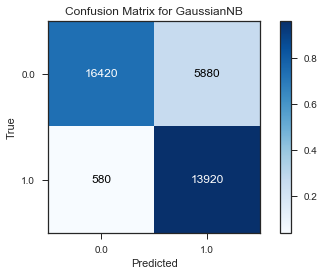

In [18]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), np.array(df['y']), classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.81
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       429
           1       0.94      0.70      0.80       492

    accuracy                           0.81       921
   macro avg       0.84      0.82      0.81       921
weighted avg       0.84      0.81      0.81       921



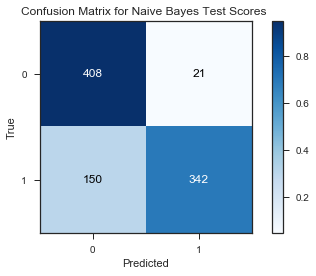

In [19]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.899 (+/- 0.010)
The IQR is 0.016 between [0.89,0.91]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     22300
         1.0       0.91      0.82      0.87     14500

    accuracy                           0.90     36800
   macro avg       0.90      0.89      0.89     36800
weighted avg       0.90      0.90      0.90     36800

The average training time is 0.014747 seconds


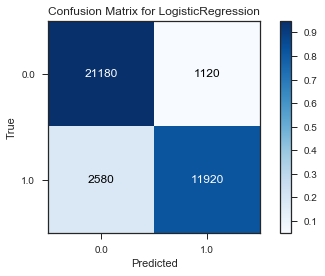

In [20]:
val_conf_LR, val_scores_LR, val_time_LR = classify(cancer_prepared, np.array(df['y']),
                                              classifiers['Logistic Regression'](solver='liblinear'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

In [21]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.88
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       606
           1       0.79      0.90      0.84       315

    accuracy                           0.88       921
   macro avg       0.87      0.89      0.87       921
weighted avg       0.89      0.88      0.88       921



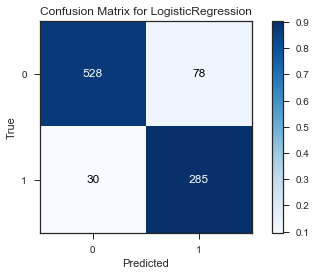

In [22]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear')
LR.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(scaled_test)
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.956 (+/- 0.008)
The IQR is 0.011 between [0.95,0.96]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22300
         1.0       0.96      0.93      0.94     14500

    accuracy                           0.96     36800
   macro avg       0.96      0.95      0.95     36800
weighted avg       0.96      0.96      0.96     36800

The average training time is 1.418015 seconds


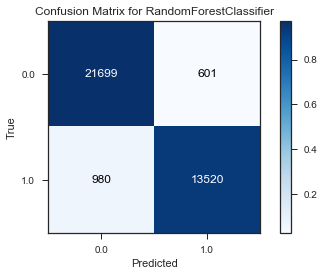

In [23]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500,n_jobs=-1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.93
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       567
           1       0.90      0.93      0.91       354

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



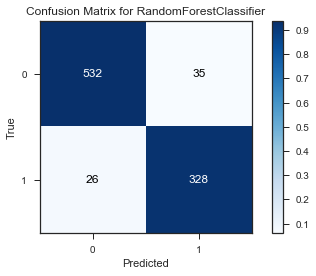

In [24]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500, n_jobs=-1)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.948 (+/- 0.011)
The IQR is 0.022 between [0.94,0.96]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     22300
         1.0       0.93      0.93      0.93     14500

    accuracy                           0.95     36800
   macro avg       0.95      0.95      0.95     36800
weighted avg       0.95      0.95      0.95     36800

The average training time is 1.406882 seconds


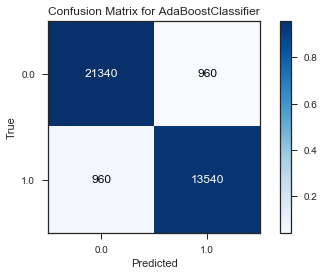

In [25]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), df['y'],
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.92
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       556
           1       0.90      0.90      0.90       365

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



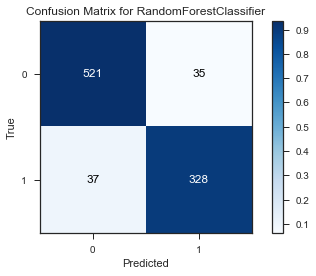

In [26]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, df_test['y']))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [27]:
np.shape(df['y'])

(3680,)

The model score is 0.908 (+/- 0.013)
The IQR is 0.019 between [0.90,0.92]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92     22300
         1.0       0.89      0.88      0.88     14500

    accuracy                           0.91     36800
   macro avg       0.90      0.90      0.90     36800
weighted avg       0.91      0.91      0.91     36800

The model score is 0.898 (+/- 0.015)
The IQR is 0.019 between [0.89,0.91]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     22300
         1.0       0.93      0.80      0.86     14500

    accuracy                           0.90     36800
   macro avg       0.91      0.88      0.89     36800
weighted avg       0.90      0.90      0.90     36800

The model score is 0.906 (+/- 0.013)
The IQR is 0.024 between [0.89,0.92]
There is 0 deleted rows
              precision    recall  f1-score   suppor

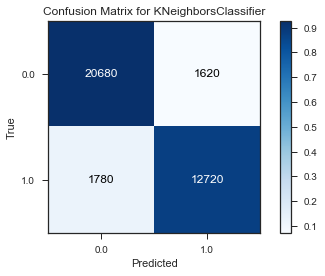

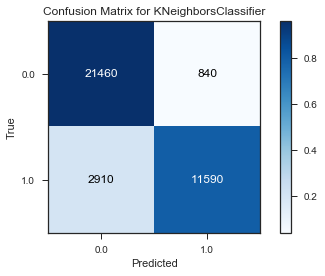

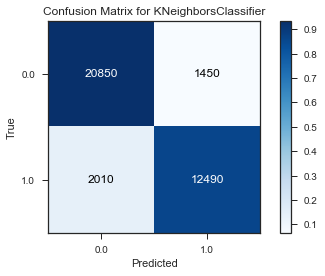

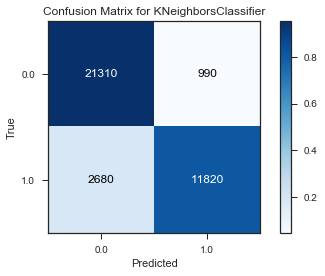

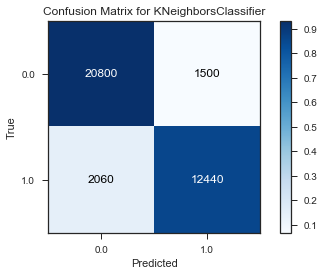

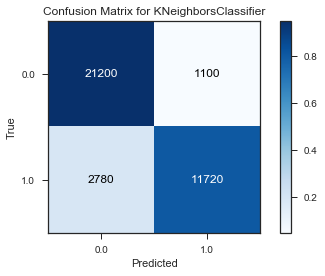

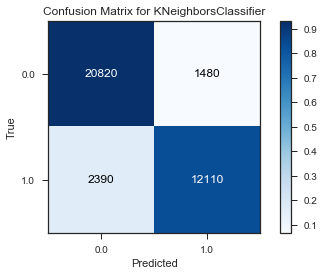

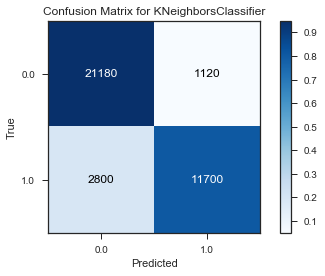

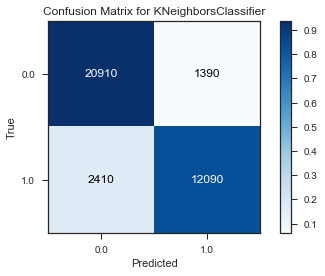

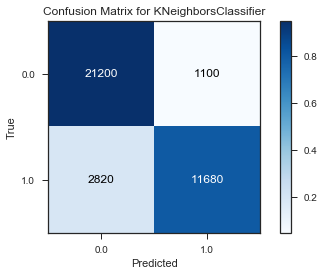

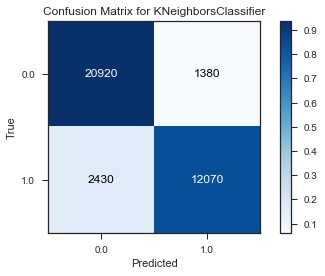

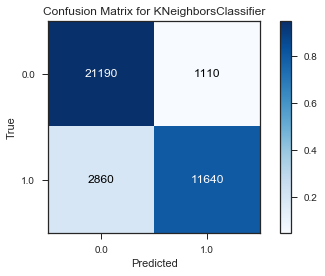

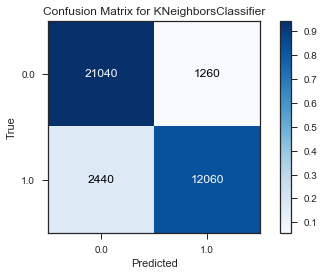

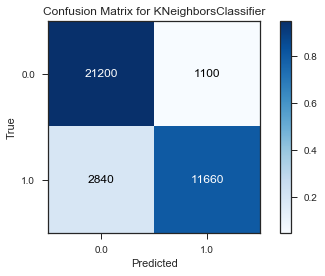

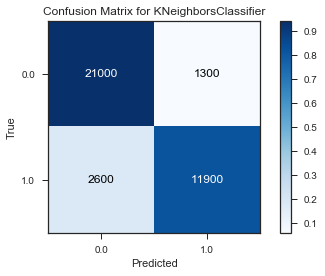

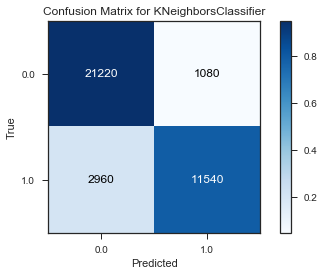

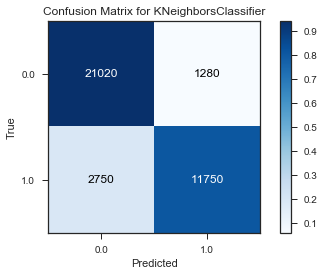

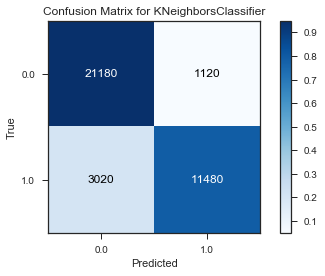

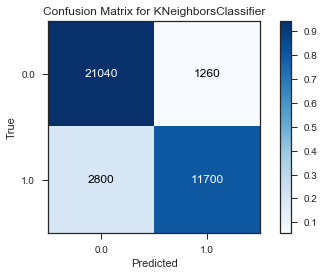

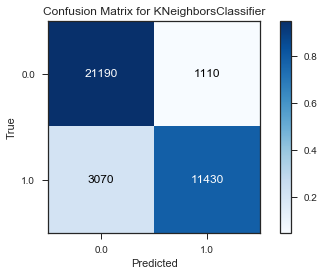

In [28]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

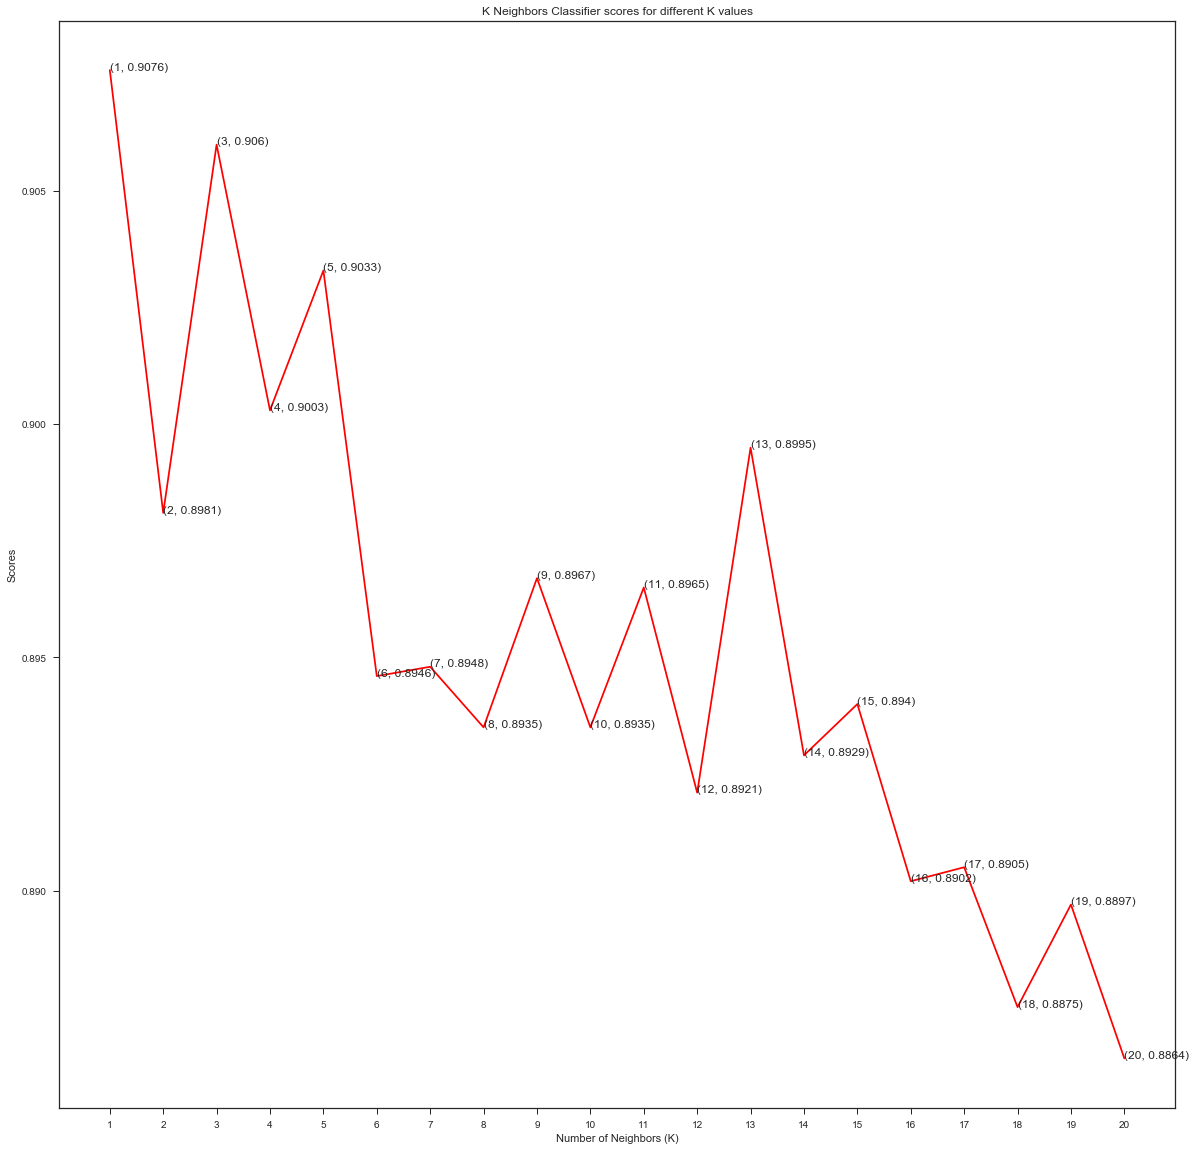

In [29]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.908 (+/- 0.013)
The IQR is 0.019 between [0.90,0.92]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92     22300
         1.0       0.89      0.88      0.88     14500

    accuracy                           0.91     36800
   macro avg       0.90      0.90      0.90     36800
weighted avg       0.91      0.91      0.91     36800

The average training time is 0.018714 seconds


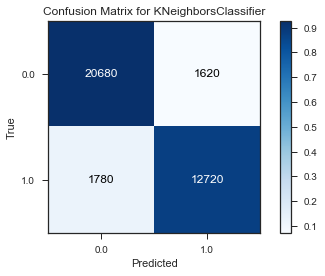

In [30]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

The test accuracy is 0.8936
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       584
           1       0.83      0.89      0.86       337

    accuracy                           0.89       921
   macro avg       0.88      0.89      0.89       921
weighted avg       0.90      0.89      0.89       921



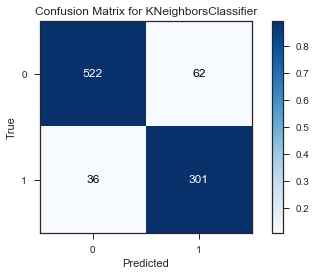

In [31]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [32]:
from time import time

In [33]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 363.334671 seconds


The model score is 0.936 (+/- 0.008)
The IQR is 0.011 between [0.93,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     22300
         1.0       0.93      0.91      0.92     14500

    accuracy                           0.94     36800
   macro avg       0.93      0.93      0.93     36800
weighted avg       0.94      0.94      0.94     36800

The average training time is 2.178174 seconds


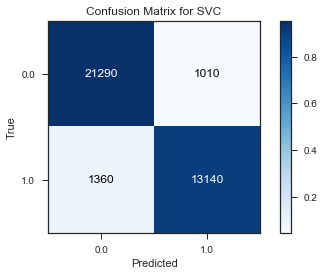

In [34]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [35]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8057065217391305 {'C': 0.03125}
0.8407608695652173 {'C': 0.0625}
0.8717391304347826 {'C': 0.125}
0.8894021739130434 {'C': 0.25}
0.9016304347826087 {'C': 0.5}
0.9154891304347826 {'C': 1.0}
0.9214673913043478 {'C': 2.0}
0.9260869565217391 {'C': 4.0}
0.9282608695652174 {'C': 8.0}
0.9323369565217391 {'C': 16.0}
0.9323369565217391 {'C': 32.0}
0.9331521739130435 {'C': 64.0}
0.9328804347826087 {'C': 128.0}
0.9339673913043478 {'C': 256.0}
0.9339673913043478 {'C': 512.0}
0.9347826086956522 {'C': 1024.0}
0.9355978260869565 {'C': 2048.0}
0.9347826086956522 {'C': 4096.0}
0.9347826086956522 {'C': 8192.0}
0.9347826086956522 {'C': 16384.0}
0.935054347826087 {'C': 32768.0}


The test accuracy is 0.9218
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       564
           1       0.89      0.91      0.90       357

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



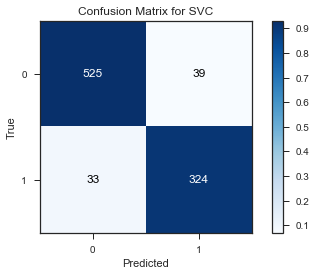

In [37]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [38]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10,n_jobs=-1)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 1200.563903 seconds


The model score is 0.942 (+/- 0.008)
The IQR is 0.014 between [0.94,0.95]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     22300
         1.0       0.94      0.92      0.93     14500

    accuracy                           0.94     36800
   macro avg       0.94      0.94      0.94     36800
weighted avg       0.94      0.94      0.94     36800

The average training time is 0.282379 seconds


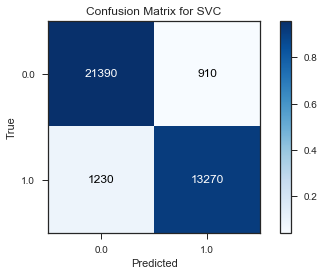

In [39]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.9273
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       573
           1       0.89      0.93      0.91       348

    accuracy                           0.93       921
   macro avg       0.92      0.93      0.92       921
weighted avg       0.93      0.93      0.93       921



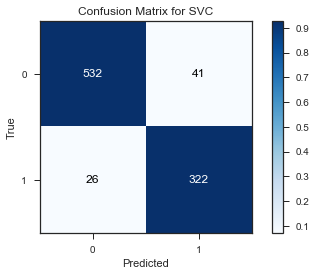

In [40]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

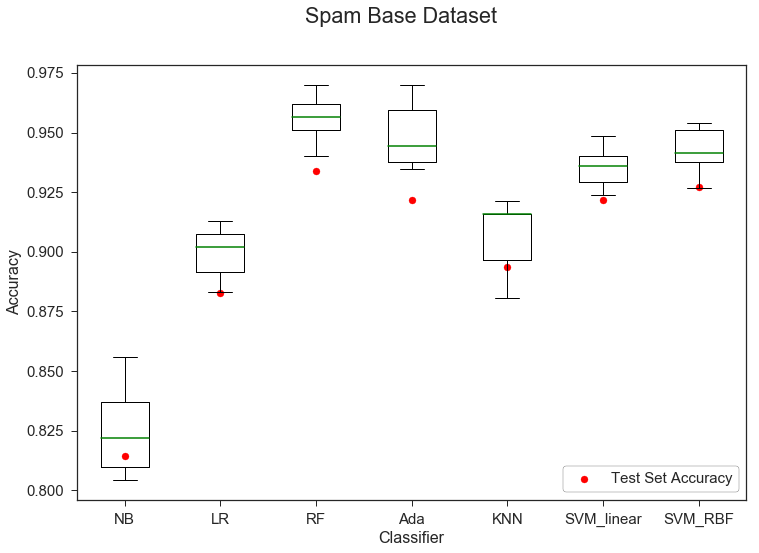

In [46]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,8))
fig.suptitle('Spam Base Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend(frameon=True, edgecolor='black', loc='lower right')
# ax.set_ylim([0.69,1])
ax.set_ylabel('Accuracy', fontsize = 16)
ax.set_xlabel('Classifier', fontsize = 16)
plt.show()


In [42]:
test_results

[0.8143322475570033,
 0.8827361563517915,
 0.9337676438653637,
 0.9218241042345277,
 0.8935939196525515,
 0.9218241042345277,
 0.9272529858849077]

In [43]:
val_results = [val_scores_NB.mean(), val_scores_LR.mean(), val_scores_RF.mean(), val_scores_Ada.mean(), 
             val_scores_KNN.mean(), val_scores_SVM_L_opt.mean(), val_scores_SVM_RBF.mean()]
pd.DataFrame(val_results)

,0
0,0.824457
1,0.899457
2,0.956332
3,0.947826
4,0.907609
5,0.935598
6,0.941848


In [44]:
pd.DataFrame([0.8143322475570033,
 0.8751357220412594,
 0.9522258414766558,
 0.9283387622149837,
 0.9077090119435396,
 0.9163952225841476,
 0.9261672095548317])

,0
0,0.814332
1,0.875136
2,0.952226
3,0.928339
4,0.907709
5,0.916395
6,0.926167


In [45]:
val_spam=[val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF]
%store val_spam

Stored 'val_spam' (list)
